# Tutorial 4- Well Log Interpretation
"""
@author: Sarthak Chauhan
Geophysical Technology, IIT Roorkee
"""



# Data Extraction

In [11]:
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel(r'C:\Users\Sarthak\Dropbox\Semester\Sem 7\Well log\Tutorial-4.xlsx')
X = dataset.iloc[1:, 1:].values
y = dataset.iloc[1:, 0].values
#ym = y * 0.3048

# DISPLAY THE DATASET
print(dataset)





         Unnamed: 0 Unnamed: 1 Unnamed: 2    Unnamed: 3    Unnamed: 4  \
0        Depth (ft)  Cali (in)  GR (GAPI)  AT10 (Ohm.m)  AT20 (Ohm.m)   
1             19900     8.5819    44.6445        1.0878        0.8438   
2           19900.5     8.7086    42.6462        1.0031        0.7751   
3             19901      8.798    36.2896        0.9749        0.7463   
4           19901.5     8.9892    35.3356        0.9342         0.717   
...             ...        ...        ...           ...           ...   
1048570         NaN        NaN        NaN           NaN           NaN   
1048571         NaN        NaN        NaN           NaN           NaN   
1048572         NaN        NaN        NaN           NaN           NaN   
1048573         NaN        NaN        NaN           NaN           NaN   
1048574         NaN        NaN     15.098           NaN           NaN   

           Unnamed: 5    Unnamed: 6    Unnamed: 7   Unnamed: 8   Unnamed: 9  \
0        AT30 (Ohm.m)  AT60 (Ohm.m)  AT90 (O

# Visualising the Well Log results

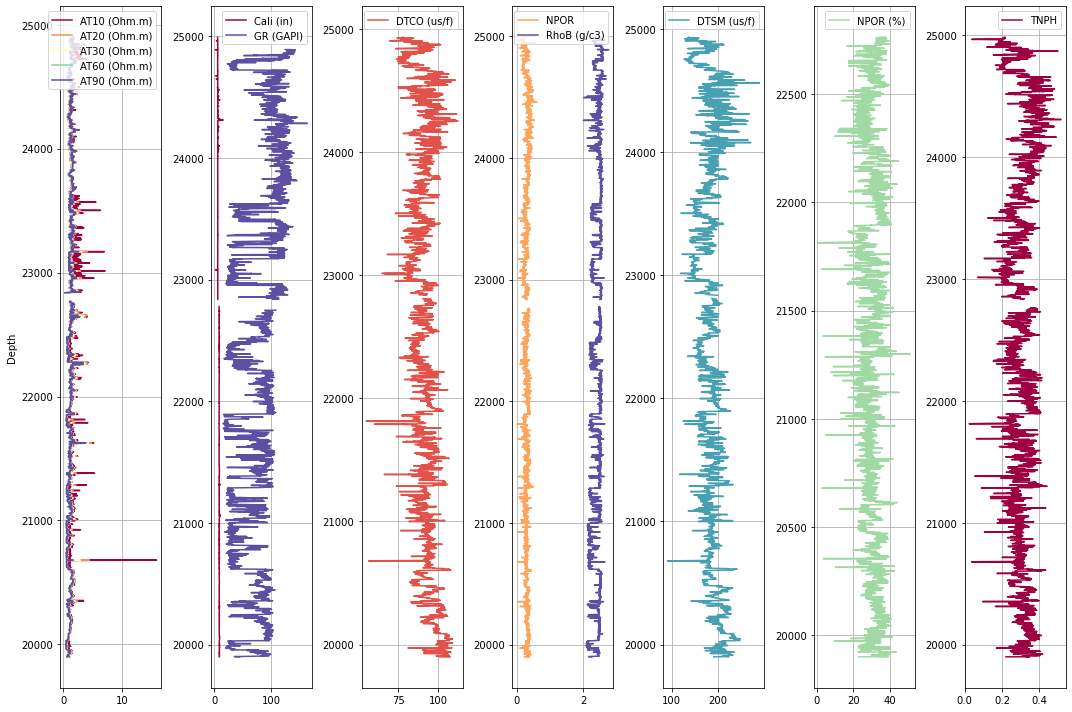

In [12]:

def get_cmap(n, name='Spectral'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

fig, ax = plt.subplots(nrows=1, ncols=7,figsize=(15,10))

cmap = get_cmap(5)
for i in range(2,7):
    t=i-2
    ax[0].plot(X[:,i], y,c=cmap(t),label=str(dataset.iloc[0,i+1]))
ax[0].set_ylabel("Depth")
#ax[0].set_title("Resistivity Plot")
ax[0].legend(loc="upper right")
ax[0].grid()

cmap = get_cmap(8)
ax[1].plot(dataset.iloc[1:,1].values, y,c=cmap(0), label=str(dataset.iloc[0,1]))
ax[1].plot(dataset.iloc[1:,2].values, y,c=cmap(8), label=str(dataset.iloc[0,2]))
ax[1].legend(loc="upper right")
ax[1].grid()
ax[2].plot(dataset.iloc[1:,8].values, y,c=cmap(1), label=str(dataset.iloc[0,8]))
ax[2].legend(loc="upper right")
ax[2].grid()
ax[3].plot(dataset.iloc[1:,10].values, y,c=cmap(2), label=str(dataset.iloc[0,10]))
ax[3].plot(dataset.iloc[1:,12].values, y,c=cmap(7), label=str(dataset.iloc[0,12]))
ax[3].legend(loc="upper right")
ax[3].grid()
ax[4].plot(dataset.iloc[1:,9].values, y,c=cmap(6), label=str(dataset.iloc[0,9]))
ax[4].legend(loc="upper right")
ax[4].grid()
ax[5].plot(dataset.iloc[1:,11].values, y,c=cmap(5), label=str(dataset.iloc[0,11]))
ax[5].legend(loc="upper right")
ax[5].grid()
ax[6].plot(dataset.iloc[1:,13].values, y,c=cmap(0), label=str(dataset.iloc[0,13]))
ax[6].legend(loc="upper right")
ax[6].grid()

fig.tight_layout()
plt.show()
















 # CALCULATIONS

In [13]:
# SELECTED A DEPTH POINT
depth=21870 #feet

temp_grad=1.0/100.0 #deg.F/feet
pressure_grad=0.56 #psi
rho_matrix=2.65
rho_shale=2.5
m=2

#initial assumption
rho_water=1.0


Gmax=max(dataset.iloc[1:,2].values)
Gmin=min(dataset.iloc[1:,2].values)

temp=depth*temp_grad + 70 #deg. F
fluid_pressure = 0.45* depth


depth_data= list(dataset.iloc[1:,0].values)
depth_index= depth_data.index(depth)+ 1

G=float(dataset.iloc[depth_index,2])

V_shale = (G - Gmin)/(Gmax - Gmin)


rho_bulk=float(dataset.iloc[depth_index,12])



for i in range(0,3):
    print("Iteration "+ str(i+1)+".....")
    porosity = (((1- V_shale)* rho_matrix + V_shale*rho_shale) - rho_bulk) /((
             (1- V_shale)* rho_matrix + V_shale*rho_shale) - rho_water)
    if porosity<0.0001:
        print("...Stop")
        break
    print("Porosity: "+ str(porosity))
    Ro=(float(dataset.iloc[depth_index,3]) + float(dataset.iloc[depth_index,4]) +
        float(dataset.iloc[depth_index,5]) + float(dataset.iloc[depth_index,6]) +
        float(dataset.iloc[depth_index,7]))/5.0
    print("Ro: "+ str(Ro))
    Rw=Ro * (porosity**m)
    print("Rw: "+ str(Rw))
    NaCl = 10**((1.047)*(np.log10(3647.5)-np.log10(Rw*((temp+6.77)/81.77)-0.0123)))
    #NaCl = NaCl/1000000
    rho_water=NaCl
    print("NaCL: "+ str(NaCl))







Iteration 1.....
Porosity: 0.14499882942286296
Ro: 1.06902
Rw: 0.022475782604057228
NaCL: 88246.4165815287
Iteration 2.....
...Stop
